In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [14]:
cars_df = pd.DataFrame({"car": ["BMW", "Audi", "BMW", "Mersedes"],
                        "retailer": ["Best cars ever", "Best cars ever", "Best cars ever", "AutoMoto"]})
cars_df

,car,retailer
0,BMW,Best cars ever
1,Audi,Best cars ever
2,BMW,Best cars ever
3,Mersedes,AutoMoto


In [15]:
pd.get_dummies(cars_df)

,car_Audi,car_BMW,car_Mersedes,retailer_AutoMoto,retailer_Best cars ever
0,0,1,0,0,1
1,1,0,0,0,1
2,0,1,0,0,1
3,0,0,1,1,0


In [16]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit_transform(cars_df["car"])

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [17]:
lb.fit_transform(cars_df["retailer"])

array([[1],
       [1],
       [1],
       [0]])

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

duncan = sm.datasets.get_rdataset("Duncan", "carData")

In [19]:
duncan.data

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


In [20]:
prestige_df = duncan.data.copy()
prestige_dummies = pd.get_dummies(prestige_df)
print(prestige_dummies)

                    income  education  prestige  type_bc  type_prof  type_wc
accountant              62         86        82        0          1        0
pilot                   72         76        83        0          1        0
architect               75         92        90        0          1        0
author                  55         90        76        0          1        0
chemist                 64         86        90        0          1        0
minister                21         84        87        0          1        0
professor               64         93        93        0          1        0
dentist                 80        100        90        0          1        0
reporter                67         87        52        0          0        1
engineer                72         86        88        0          1        0
undertaker              42         74        57        0          1        0
lawyer                  76         98        89        0          1        0

In [21]:
prestige_df = duncan.data.copy()
prestige_dummies = pd.get_dummies(prestige_df.select_dtypes(include=[object]))
prestige_df = pd.concat([prestige_df, prestige_dummies], axis=1)
print(prestige_df)

                    type  income  education  prestige  type_bc  type_prof  \
accountant          prof      62         86        82        0          1   
pilot               prof      72         76        83        0          1   
architect           prof      75         92        90        0          1   
author              prof      55         90        76        0          1   
chemist             prof      64         86        90        0          1   
minister            prof      21         84        87        0          1   
professor           prof      64         93        93        0          1   
dentist             prof      80        100        90        0          1   
reporter              wc      67         87        52        0          0   
engineer            prof      72         86        88        0          1   
undertaker          prof      42         74        57        0          1   
lawyer              prof      76         98        89        0          1   

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_prestige = prestige_df.drop(["type", "prestige"], axis=1).values
y_prestige = prestige_df['prestige'].values

X_train_prestige, X_test_prestige, y_train_prestige, y_test_prestige = train_test_split(
    X_prestige, y_prestige, test_size=0.3, random_state=0)

slr_prestige = LinearRegression()
slr_prestige.fit(X_train_prestige, y_train_prestige)

y_train_pred = slr_prestige.predict(X_train_prestige)
y_test_pred = slr_prestige.predict(X_test_prestige)

print('Slope: {}'.format(slr_prestige.coef_))
print('Intercept: {:.2f}'.format(slr_prestige.intercept_))

Slope: [  0.56397932   0.32027185  -2.14826104  18.72771436 -16.57945333]
Intercept: 2.74


In [24]:
results = smf.ols('prestige ~ education + income + C(type)', data=prestige_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     105.0
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.17e-20
Time:                        23:43:32   Log-Likelihood:                -163.65
No. Observations:                  45   AIC:                             337.3
Df Residuals:                      40   BIC:                             346.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1850      3.714     -0.050      0.961      -7.691       7.321
C(type)[T.prof]    16.6575      6.993      2.382      0.022       2.524      30.791
C(type)[T.wc]     -14.6611      6.109     -2.400      0.021     -27.007      -2.315
education           0.3453      0.114      3.040      0.004       0.116       0.575
income              0.5975      0.089      6.687      0.000       0.417       0.778
==============================================================================
Omnibus:                       10.720   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.285
Skew:                           1.013   Prob(JB):                      0.00584
Kurtosis:                       4.176   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

https://towardsdatascience.com/binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation-49b025f1b510

In [25]:
url = 'https://raw.githubusercontent.com/rahul-raoniar/Rahul_CODIFY/master/Medium%20Blogs/Binary%20Logistic%20Regression%20using%20Python/diabetes.csv'

In [26]:
data1 = pd.read_csv(url)

In [27]:
data1 = data1.dropna(axis=0) 
data1.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [28]:
data_dummies = pd.get_dummies(data1)
data_dummies.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes_neg,diabetes_pos
0,1,89,66,23,94,28.1,0.167,21,1,0
1,0,137,40,35,168,43.1,2.288,33,0,1
2,3,78,50,32,88,31.0,0.248,26,0,1
3,2,197,70,45,543,30.5,0.158,53,0,1
4,1,189,60,23,846,30.1,0.398,59,0,1


In [29]:
del data_dummies['diabetes_neg']
data_dummies.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes_pos
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


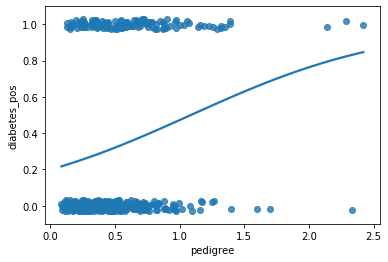

In [30]:
sns.regplot(x = data_dummies['pedigree'], y = data_dummies['diabetes_pos'], 
            y_jitter = 0.03,
            data = data_dummies, 
            logistic = True,
            ci = None)
plt.show()

In [31]:
x = data_dummies[['pedigree']].values
y = data_dummies['diabetes_pos'].values

model = LinearRegression().fit(x,y)
X_fit = np.arange(0, 4, 1)[:, np.newaxis]
y_pred = model.predict(X_fit)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.18224037 0.46786019 0.75348002 1.03909984]


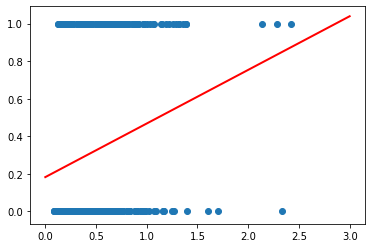

In [33]:
fig, axis = plt.subplots()
plt.scatter(x, y)
plt.plot(X_fit, y_pred, color='red', linewidth=2);
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_dummies,
                                         test_size = 0.20,
                                         random_state = 42)
train_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes_pos
258,0,180,90,26,90,36.5,0.314,35,1
182,3,81,86,16,66,27.5,0.306,22,0
172,8,126,88,36,108,38.5,0.349,49,0
63,2,96,68,13,49,21.1,0.647,26,0
340,3,80,82,31,70,34.2,1.292,27,1


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import logit 

formula = ('diabetes_pos ~ pregnant + glucose + pressure + triceps + insulin + mass + pedigree + age')

model = logit(formula = formula, data = train_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.426450
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           diabetes_pos   No. Observations:                  313
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                  0.3269
Time:                        00:03:32   Log-Likelihood:                -133.48
converged:                       True   LL-Null:                       -198.29
Covariance Type:            nonrobust   LLR p-value:                 3.382e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.3495      1.390     -7.444      0.000     -13.075      -7.624
pregnant       0.1181      0.063      1.888      0.059      -0.005       0.241
glucose        0.0380      0.006      5.937      0.000       0.025       0.051
pressure       0.0099      0.014      0.701      0.483      -0.018       0.037
triceps        0.0211      0.019      1.100      0.271      -0.017       0.059
insulin        0.0010      0.001      0.666      0.505      -0.002       0.004
mass           0.0472      0.032      1.476      0.140      -0.015       0.110
pedigree       1.2316      0.484      2.543      0.011       0.282       2.181
age            0.0188      0.020      0.950      0.342      -0.020       0.058
==============================================================================
"""

In [36]:
np.exp(model.params)

Intercept    0.000032
pregnant     1.125365
glucose      1.038708
pressure     1.009922
triceps      1.021353
insulin      1.000981
mass         1.048328
pedigree     3.426683
age          1.019004
dtype: float64

In [37]:
predicted = model.predict(test_data)
print(predicted)

78     0.246725
274    0.351528
246    0.033981
55     0.852058
387    0.836120
         ...   
361    0.080580
82     0.410230
114    0.024551
3      0.897948
18     0.621875
Length: 79, dtype: float64


X = data_dummies.iloc[:,:8]
y = data_dummies['diabetes_pos']
split = int(0.7*len(X))
 
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1 = model1.fit (X_train,y_train)

In [38]:
res = (predicted > 0.5).astype(int)
res.head()

78     0
274    0
246    0
55     1
387    1
dtype: int64

In [39]:
AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:           diabetes_pos
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pregnant       0.0161      0.008      1.921      0.055      -0.000       0.032
glucose        0.0052      0.001      7.577      0.000       0.004       0.007
pressure       0.0013      0.002      0.703      0.482      -0.002       0.005
triceps        0.0029      0.003      1.105      0.269      -0.002       0.008
insulin        0.0001      0.000      0.668      0.504      -0.000       0.001
mass           0.0064      0.004      1.494      0.135      -0.002       0.015
pedigree       0.1677      0.064      2.626      0.009       0.043       0.293
age            0.0026      0.003      0.956      0.339      -0.003       0.008


In [40]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

y_actual = test_data["diabetes_pos"]
conf_matrix = pd.crosstab(y_actual, res,
                       rownames = ["Actual"], 
                       colnames = ["Predicted"], 
                       margins = True)
print(conf_matrix)

Predicted   0   1  All
Actual                
0          44   8   52
1          11  16   27
All        55  24   79


In [41]:
print(classification_report(y_actual, res))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.67      0.59      0.63        27

    accuracy                           0.76        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.75      0.76      0.76        79

